> # Characterization of Written Texts by Fiboancci Transformation.
> 
> @aut: Jorge Adán G.
>     
> ref: Alexis Monnerot-Dumaine (2009). The Fibonacci Word fractal. Archive ouverte HAL. France (see more at https://en.wikipedia.org/wiki/Fibonacci_word).
>
>In this document we are going to build the general Fibonacci word $S_n$ shown in the Wikipedia article and its cutting sequence (see more about this in the reference). 
>Thereafter we will use the same algorithm for the construction of cutting sequences for the binary sequence from written texts (by some suitable association rule) in order to obtain a characterization as a function of the equation of the cutting sequence.

1. First we get the nth term of the Fibonacci words using the definition:
(I am testing the program for the particular case of s5 to verify that the program works)

In [1]:
def fibo_word(n):
    sn_1 = "0"
    sn = "01"

    for i in range(2, n + 1):
        tmp = sn
        sn = sn + sn_1
        sn_1 = tmp
    return sn

s5 = fibo_word(5)
print(s5)

0100101001001


> Effectively it is $S_5 = 0100101001001$ shown in the bibliography.

> 2. Now we write a function that takes a binary sequence and returns the points that are on the cutting axes.
>
> The Algorithm is as follows:
>
> Given the starting position on the grid (xy plane): $(𝑎_0,𝑏_0)=(0,0) $ and a binary string:
>
> * If the ith digit of the string is 0: $(𝑥_i,𝑦_i)=(𝑎_{𝑖−1}),𝑏_{𝑖−1})+(1,𝛾)$. The position is updated to: $ (𝑎_i,𝑏_i) =(𝑎_{𝑖−1},𝑏_{𝑖−1})+(1,0) $
>
> * If the ith digit of the string is 1: $ (𝑥_𝑖,𝑦_𝑖)=(𝑎_{𝑖−1},𝑏_{𝑖−1})+(𝛾,1) $ Position is updated to: $ (𝑎_𝑖,𝑏_𝑖)=(𝑎_{𝑖−1},𝑏_{𝑖−1})+(0,1)$.
>
> Here 𝛾 is a random number between zero and one. 
> (Note: I found this algorithm by plotting the points by hand for the case $S_5$ on a grid.)
>
>Implementing this we obtain $ \{(x_i, y_i)\}$ for $i = 1, 2, ..., L$ where $L$ is the lenght of the binary sequence.

In [2]:
def bin_to_cords(binary):
    import random
    import numpy as np
    
    x0 = 0
    y0 = 0
    x = []
    y = []
    for k in binary:
        if k == "0":
            temp = random.uniform(0, 1)
            
            x0 += 1
            y0 += temp
            x.append(x0)
            y.append(y0)
            y0 -= temp
        else:
            temp = random.uniform(0, 1)
    
            x0 += temp
            y0 += 1
            x.append(x0)
            y.append(y0)
            x0 -= temp
    
    x = np.array(x)
    y = np.array(y)
    
    return x, y

> Let us confirm the performance of this algorithm for a small case, for example $S_5 = 0100101001001$

In [3]:
import numpy as np
import random

random.seed(10)
s5 = fibo_word(5)
binary = s5
x, y = bin_to_cords(binary)

We obtain the linear regression for the points in the cutting sequence:

In [4]:
import scipy
from scipy import stats

alpha = scipy.stats.linregress(x, y)
m = alpha[0]
b = alpha[1]
print('m = ', m)
print('b = ', b)

m =  0.5834417877826819
b =  0.10342922133377863


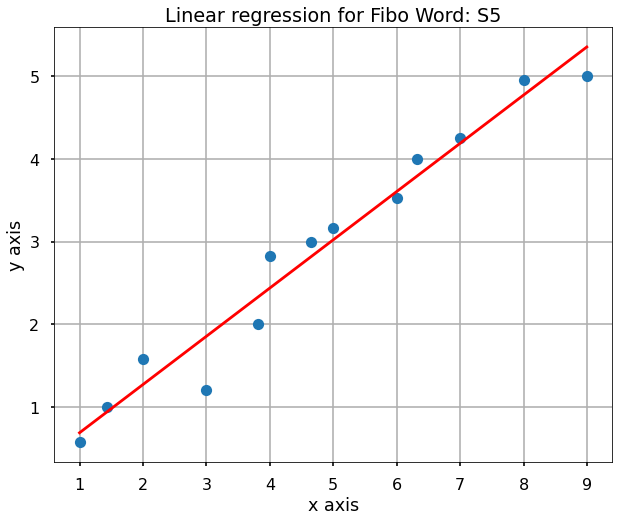

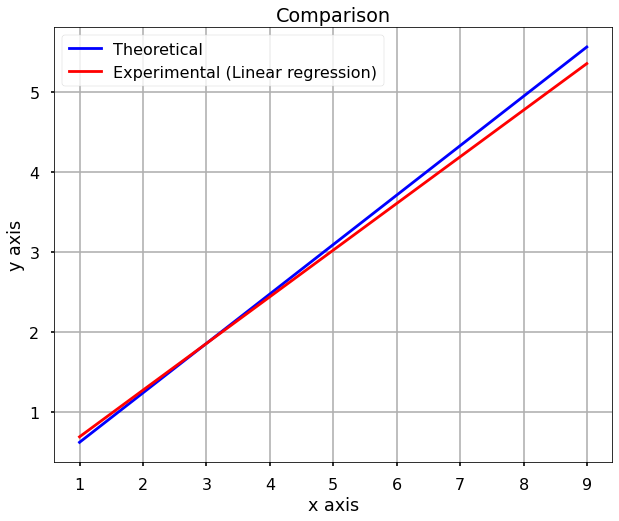

In [5]:
from matplotlib import pyplot as plt
from numpy import sqrt 

phi = (1+sqrt(5))/2

# Fig. 1

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))

plt.plot(x,y, 'o')
plt.plot(x, m*x + b, 'r')

plt.title('Linear regression for Fibo Word: S5')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.grid()

plt.show()

# Fig. 2

plt.figure(figsize = (10,8))
plt.plot(x, 1/phi*x, 'b')
plt.plot(x, m*x + b, 'r')

plt.legend(['Theoretical', 'Experimental (Linear regression)'])

plt.title('Comparison')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.grid()


plt.show()

> For this case of a small number of elements we can visualize the line obtained (in red), there is a significant difference with respect to the theoretical line (in blue).
>
> In the bibliography we observe that to obtain the exact value of the inverse of the golden ratio it is necessary to use the fibonacci word in the limit when $n \rightarrow \infty$. 
> 
> Since we cannot compute for the infinite lenght Fibonacci word, we will test for $S_{20}$, which is a binary sequence of 17,711 elements. We get the following results:

In [6]:
binary = fibo_word(20)

x, y = bin_to_cords(binary)

alpha = scipy.stats.linregress(x, y)
m = alpha[0]
b = alpha[1]

err = abs(m-1/phi)/(1/phi)
decimalperc = '{:.10f}'.format(float(err*100))

print('m =', m)
print('b =', b)
print('\nConsidering theoretical slope m = ', 1/phi)
print('we obtain: approximation error for the slope = ' + decimalperc + ' %')


m = 0.6180336651634829
b = 0.0022004837192071136

Considering theoretical slope m =  0.6180339887498948
we obtain: approximation error for the slope = 0.0000523574 %


> We obtained a slope that is close to the inverse of the golden ratio, it is to be expected that as the length of the binary increases we will get closer to the value of the inverse of the golden ratio, as well as the intercept closer to zero. 

# Text analysis

>3. We are ready to define a rule to obtain a binary sequence from a typed text.
>A simple rule to obtain the binary code is to analyze a pair of vowels $(v_0, v_1)$, so that we associate:
>
>     $ v_0 \rightarrow 0 $
>
>     $ v_1 \rightarrow 1 $
>
>For example, if we consider 
>     $ i \rightarrow 0 $ and
>     $ e \rightarrow 1 $,
>the sentence:
>
> 'This is an example' $\rightarrow 0011$ 
>
>Note that we are ignoring whether or not is a capital letter. We can implement this straightforward:


In [7]:
def text_to_bin(text, c1, c2):
    myBinary = ''
    
    for i in text:
        if i.lower() == c1:
            myBinary += '0'
        elif i.lower() == c2:
            myBinary += '1'
            
    return myBinary

>Using the following text from Project Gutenberg: Sherlock Holmes, from Arthur Conan Doyle:

> * Number of words: 95584
> * Number of characters: 562280

>And using the functions that we constructed before:

In [8]:
# First 1000 text characters:

text_name = '../input/sherlock-holmes-txt/Sherlock.txt'

with open(text_name, encoding='utf8') as f:
    text = f.read()

print('Number of words: ', len(list(text.split(' '))))
print('Number of characters: ', len(text))
print('\n')

print(text[:1000])

Number of words:  95584
Number of characters:  562280


The Adventures of Sherlock Holmes

by Arthur Conan Doyle


Contents

   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue Carbuncle
   VIII.  The Adventure of the Speckled Band
   IX.    The Adventure of the Engineer’s Thumb
   X.     The Adventure of the Noble Bachelor
   XI.    The Adventure of the Beryl Coronet
   XII.   The Adventure of the Copper Beeches




I. A SCANDAL IN BOHEMIA


I.

To Sherlock Holmes she is always _the_ woman. I have seldom heard him
mention her under any other name. In his eyes she eclipses and
predominates the whole of her sex. It was not that he felt any emotion
akin to love for Irene Adler. All emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanced mind. He
was, I take it, the mo

> We can analyse all the possible cases:
>
> ▪ (a,e), (a,i), (a,o), (a,u)
>
> ▪ (e,i), (e,o), (e,u)
>
> ▪ (i,o), (i,u)
>
> ▪ (o,u)
>
> I will work in the first case only, considering that the comparison (a,e) = (e,a), taking the case where 0 < m < 1, since we are comparing with $1/\Phi$ 

In [9]:
c1 = 'e'
c2 = 'o'
binary = text_to_bin(text, c1, c2)
print(binary[:100])

0001011011010100000000100110000010000000100000010000001000000010100100010011000010100001010110001001


> We compute for 100 random cases and get the mean for $m$ and $b$. We get the values:

In [10]:
from random import randint

seedList = [randint(100, 1000) for p in range(0, 100)]
mList = []
bList = []

for mySeed in seedList:
    random.seed(mySeed)
    x, y = bin_to_cords(binary)
    alpha = scipy.stats.linregress(x, y)
    m = alpha[0]
    b = alpha[1]

    mList.append(m)
    bList.append(b)
x, y = bin_to_cords(binary)

alpha = scipy.stats.linregress(x, y)
m = alpha[0]
b = alpha[1]
print('m = ', m)
print('b = ', b)


m =  0.6269424928669786
b =  9.875580645006266


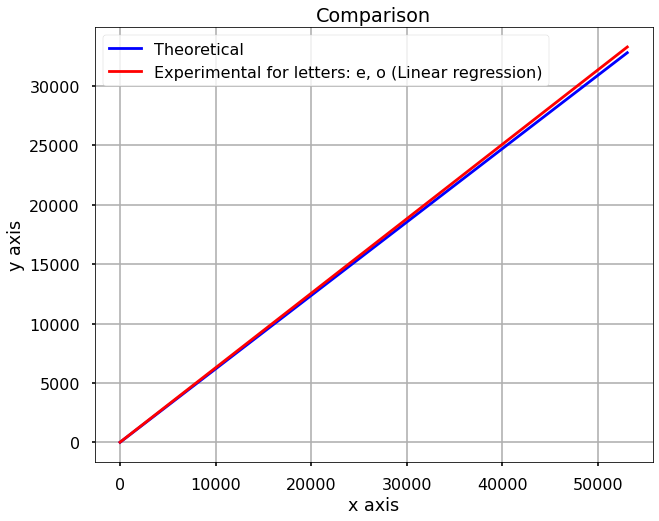

In [11]:
plt.figure(figsize = (10,8))
plt.plot(x, 1/phi*x, 'b')
plt.plot(x, m*x + b, 'r')

plt.legend(['Theoretical', 'Experimental for letters: ' + c1 + ', ' + c2 + ' (Linear regression)'])

plt.title('Comparison')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.grid()


plt.show()

In [12]:
err = abs(m-1/phi)/(1/phi)
decimalperc = '{:.10f}'.format(float(err*100))

print('m =', m)
print('b =', b)
print('\nConsidering theoretical slope m = ', 1/phi)
print('we obtain Approximation error for the slope = ' + decimalperc + ' %')

m = 0.6269424928669786
b = 9.875580645006266

Considering theoretical slope m =  0.6180339887498948
we obtain Approximation error for the slope = 1.4414262450 %


There is a little difference but it is interesting that there is a link between inverse of Golden ratio. We also observe a similar behavior for the pair (e,a) in English language, and for (e, o), (i, o) in Spanish language.
We conclude this section by commenting on cases where a proper fit may not always exist. The problem is in the limit cases in which we have a large consecutive repetition of the same digit and then a consecutive repetition of the other digit, so that points are generated on the cutting axes that generate an abrupt change. An example of these cases is when we have binary strings of the form $0000000000000111111111111$, since the linear regression will not have an adequate fit. The quantity b is different from zero here because of this aspect of the method for cutting sequence but we can see that if we shuffle the binary code and do some statistics with multiple cases we have that the b value average is indeed zero. 